In this assignment, we will use dataset downloaded from Kaggle.

https://www.kaggle.com/datasets/datasnaek/youtube-new?resource=download

Steps we will follow:

1. Import libraries

2. Check dataset

3. Data cleaning

4. Analysis

5. Conclusion

We want to learn and achieve the following goals:

1. What is the category that has the highest number of videos?

2. What is the most popular category?

3. What is the channel that posted the most frequent?

4. Which channel has got the highest number of views?

5. Which channel has got the highest number of likes?



---

# **0. Import libraies**


In [ ]:
import pandas as pd
from datetime import datetime
import json
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

---

# **1. Check dataset**

In [ ]:
# create the dataframe
df = pd.read_csv('/content/drive/MyDrive/1. Data Science/1. Trending YouTube Video Statistics /CAvideos.csv')

In [ ]:
# show the dataframe (show only the first 5 rows)
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [ ]:
# show the last 5 rows of the dataframe
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...
40880,POTgw38-m58,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,24,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62,251,https://i.ytimg.com/vi/POTgw38-m58/default.jpg,False,False,False,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...


In [ ]:
# show the dimension of the dataframe (row x column)
df.shape

(40881, 16)

*We can see that there are 40,881 rows and 16 columns in the dataset.*

---



In [ ]:
# show the non-null count and datatype of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

*We can see that variables from index 7 to 15 have null values.*

---



# **2. Data cleaning**

In [ ]:
# check the null values (missing values) again
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

*We can clearly see the number of missing values in each varaible.*

*So we should remove those missing values*

*But first, let's remove those variables that we think we don't need them.*

*I think we don't need the following variables:*

*1. description*

*2. thumbnail_link*

*3. video_id*

---



In [ ]:
# remove variables: description, thumbnail_link and video_id
df.drop(df.columns[df.columns.str.contains('description', case=False)], axis=1, inplace=True)

In [ ]:
df.drop(df.columns[df.columns.str.contains('thumbnail_link', case=False)], axis=1, inplace=True)

In [ ]:
df.drop(df.columns[df.columns.str.contains('video_id', case=False)], axis=1, inplace=True)

In [ ]:
# check the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   category_id             40881 non-null  int64 
 4   publish_time            40881 non-null  object
 5   tags                    40881 non-null  object
 6   views                   40881 non-null  int64 
 7   likes                   40881 non-null  int64 
 8   dislikes                40881 non-null  int64 
 9   comment_count           40881 non-null  int64 
 10  comments_disabled       40881 non-null  bool  
 11  ratings_disabled        40881 non-null  bool  
 12  video_error_or_removed  40881 non-null  bool  
dtypes: bool(3), int64(5), object(5)
memory usage: 3.2+ MB


*We now can see that there are 12 varaibles only as opposed to 15 initially.*

---



In [ ]:
# also check only the name of variables
df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

In [ ]:
# check if there are duplicate rows or not
df[df.duplicated()].shape

(0, 13)

*We can see that there is no diplicate row as the row index represents 0.*

---



In [ ]:
# check the null values again in descending order
df.isnull().sum().sort_values(ascending=False)

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

*We can see that there are some variables that have missing values (1 missing value each).*

---



In [ ]:
# drop rows where the values are null in each specific variable
df.dropna(subset=['views'], inplace=True)

In [ ]:
df.dropna(subset=['likes'], inplace=True)

In [ ]:
df.dropna(subset=['dislikes'], inplace=True)

In [ ]:
df.dropna(subset=['comment_count'], inplace=True)

In [ ]:
df.dropna(subset=['comments_disabled'], inplace=True)

In [ ]:
df.dropna(subset=['ratings_disabled'], inplace=True)

In [ ]:
# check the null values again
df.isnull().sum().sort_values(ascending=False)

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

*There is now no null values in each variable.*

---



In [ ]:
# show the dataframe again
df.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False


In [ ]:
# change datetime format of variable 'publish_time' to yyyy-mm-dd
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [ ]:
# check the variable 'publish_time'
df['publish_time']

0       2017-11-10 17:00:03
1       2017-11-13 17:00:00
2       2017-11-12 19:05:24
3       2017-11-12 18:01:41
4       2017-11-09 11:04:14
                ...        
40876   2018-06-13 18:00:07
40877   2018-06-13 19:01:18
40878   2018-06-11 17:30:53
40879   2018-06-13 04:00:05
40880   2018-06-13 16:00:03
Name: publish_time, Length: 40881, dtype: datetime64[ns]

*Just in case there are non-matching values, so we need to change it to NaN.*

---



In [ ]:
# set non-matching values to NaN
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

In [ ]:
# show the variable 'publish_time' again
df['publish_time']

0       2017-11-10 17:00:03
1       2017-11-13 17:00:00
2       2017-11-12 19:05:24
3       2017-11-12 18:01:41
4       2017-11-09 11:04:14
                ...        
40876   2018-06-13 18:00:07
40877   2018-06-13 19:01:18
40878   2018-06-11 17:30:53
40879   2018-06-13 04:00:05
40880   2018-06-13 16:00:03
Name: publish_time, Length: 40881, dtype: datetime64[ns]

In [ ]:
# for practice, let's try to drop the first two rows in the dataframe
df = df.drop(index=[0, 1]).reset_index(drop=True)

In [ ]:
# check the dataframe again
df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False
1,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False
2,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False
3,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13 07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,False,False,False
4,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12 23:52:13,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
40875,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
40876,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False
40877,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False


In [ ]:
# check the dimension of the dataframe
df.shape

(40879, 13)

*We now have 40,879 rows left.*

---


In [ ]:
# set datetime format of the variable 'trending_date'
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

In [ ]:
# check the variable 'trending_date'
df['trending_date']

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40874   2018-06-14
40875   2018-06-14
40876   2018-06-14
40877   2018-06-14
40878   2018-06-14
Name: trending_date, Length: 40879, dtype: datetime64[ns]

In [ ]:
# show the dataframe again
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False
1,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False
2,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False
3,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13 07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,False,False,False
4,2017-11-14,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12 23:52:13,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,False,False,False


In [ ]:
# check the datatypes of the variables
df.dtypes

trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
dtype: object

In [ ]:
# change datatype of views, likes, dislikes and comment_count variables from int64 to float64
type_float_list = ['views', 'likes', 'dislikes', 'comment_count']

for i in type_float_list:
    df[i] = df[i].astype(float)

In [ ]:
# change the datatype of category_id from int64 to str
df['category_id'] = df['category_id'].astype(str)

In [ ]:
# check the datatype again
df.dtypes

trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                       object
publish_time              datetime64[ns]
tags                              object
views                            float64
likes                            float64
dislikes                         float64
comment_count                    float64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
dtype: object

*We now have those variables' datatype in float.*

---



In [ ]:
# match category_id to its actual title
id_to_category = {}

with open('/content/drive/MyDrive/1. Data Science/1. Trending YouTube Video Statistics /CA_category_id.json', 'r') as f:
    data = json.load(f)
    for i in data['items']:
        id_to_category[i['id']] = i['snippet']['title']

In [ ]:
# show the result
id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [ ]:
# add a column named 'category' next to the column 'category_id'
df.insert(4, 'category', df['category_id'].map(id_to_category)) # already added

In [ ]:
# check those two columns
df[['category_id', 'category']]

,category_id,category
0,23,Comedy
1,24,Entertainment
2,10,Music
3,25,News & Politics
4,23,Comedy
...,...,...
40874,24,Entertainment
40875,24,Entertainment
40876,20,Gaming
40877,25,News & Politics


In [ ]:
# check the dataframe again
df.head()

,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,False,False,False
1,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,False,False,False
2,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,False,False,False
3,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,News & Politics,2017-11-13 07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699.0,103755.0,4613.0,12143.0,False,False,False
4,2017-11-14,Vanoss Superhero School - New Students,VanossGaming,23,Comedy,2017-11-12 23:52:13,"Funny Moments|""Montage video games""|""gaming""|""...",2987945.0,187464.0,9850.0,26629.0,False,False,False


In [ ]:
# remove 'tag' variable
df.drop(df.columns[df.columns.str.contains('tags')], axis=1, inplace=True)

In [ ]:
# check columns
df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id', 'category',
       'publish_time', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

*So the tag column was removed.*

---



# **4. Analysis**

In [ ]:
# count the number of rows in each category
categories = df['category'].value_counts()

In [ ]:
# show the result
categories

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3772
Music                    3730
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
Movies                      6
Name: category, dtype: int64

In [ ]:
# set up the above figure in pie chart
fig = px.pie(
    values=categories.values,
    names=categories.index,
    color_discrete_sequence=px.colors.sequential.RdBu,
    title='YouTube Categories', template='presentation'
)

In [ ]:
# add the category name inside the chart and show the result
fig.update_traces(textposition='inside',
                  textfont_size=12,
                  textinfo='percent+label')

fig.show()

*We can see that 1/3 of the category is entertainment, followed by new & politics and people & blogs which are 10.2% and 10.1%, respectively.*

*Now let's look at the number of views in each video.*

---



Text(0.5, 1.0, 'Number of views of the first 10 videos in the dataframe')

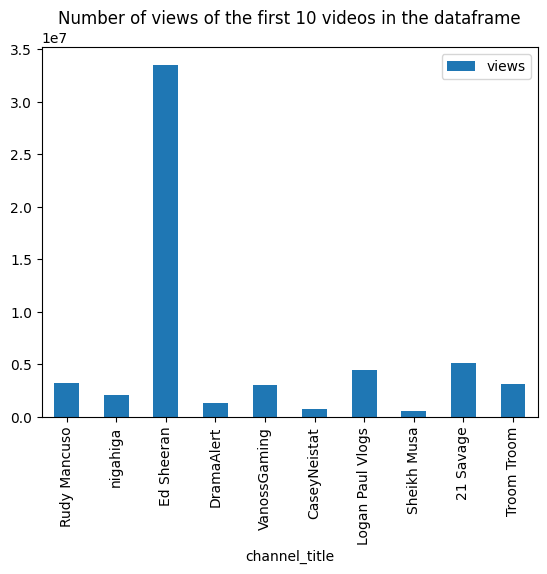

In [ ]:
# show the bar chart of number of views for the first 10 videos in the dataframe
df.head(10).plot.bar(x='channel_title', y='views')
plt.title('Number of views of the first 10 videos in the dataframe')

*It shows that a video in Ed Sheeran's channel has the highest number of views among the first 10 videos in the dataframe.*

*Now let's look the number of likes in each category.*

---



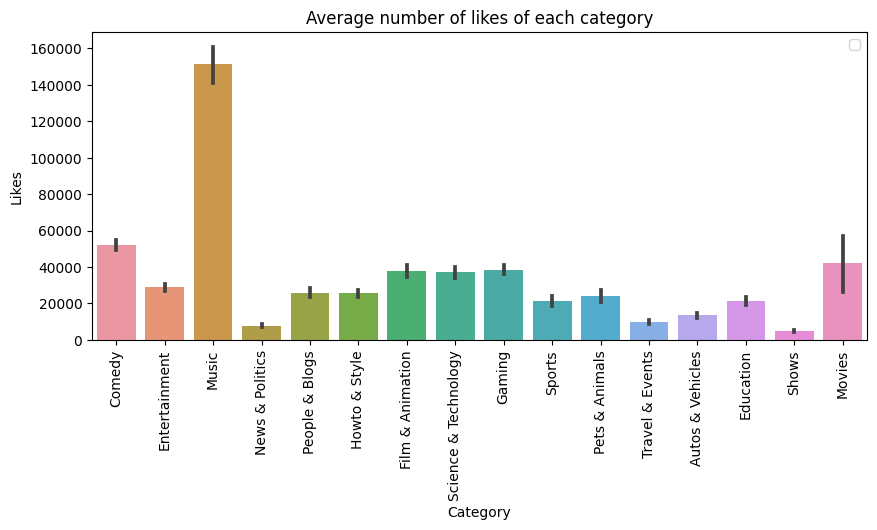

In [ ]:
# show bar plot of number of likes in each category
plt.figure(figsize=(10, 4))
sns.barplot(x='category', y='likes', data=df)
plt.title('Average number of likes of each category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation='vertical')
plt.legend()

*We can see that Music has the highest average number of likes among other categories.*

In [ ]:
# show dataframe again
df.head()

,trending_date,title,channel_title,category_id,category,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,3191434.0,146035.0,5339.0,8181.0,False,False,False
1,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,2095828.0,132239.0,1989.0,17518.0,False,False,False
2,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,33523622.0,1634130.0,21082.0,85067.0,False,False,False
3,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,News & Politics,2017-11-13 07:37:51,1309699.0,103755.0,4613.0,12143.0,False,False,False
4,2017-11-14,Vanoss Superhero School - New Students,VanossGaming,23,Comedy,2017-11-12 23:52:13,2987945.0,187464.0,9850.0,26629.0,False,False,False


*Let's look at the how many times were posted by each channel rearranged by the 'likes' variable*

---



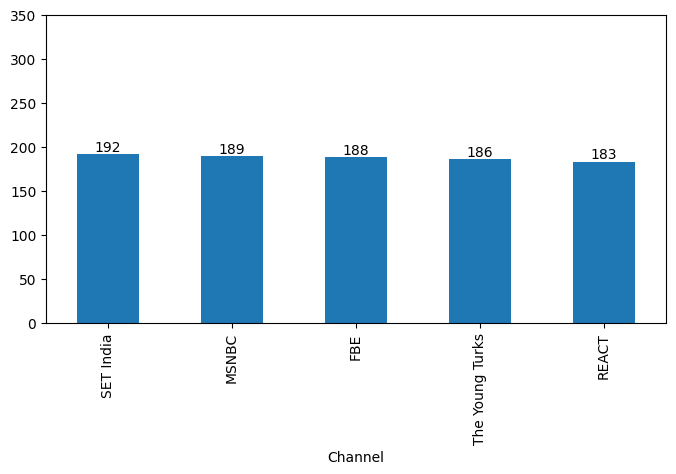

In [ ]:
# show the channels that posted most frequent by descending order of views in bar chart and show the result
df1 = df.groupby('channel_title').count().sort_values('likes', ascending=False)['category'].head()
plt.figure(figsize=(8, 4))
df1.plot.bar().bar_label(df1.plot.bar().containers[0])
plt.ylim(0, 350)
plt.xlabel('Channel')
plt.show()

*This shows that the channel 'SET India' posted most frequent with 192 videos.*

*Now let's check the channels that have received the highest number of views.*

---



<ipython-input-476-d5ce4f5ca486>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



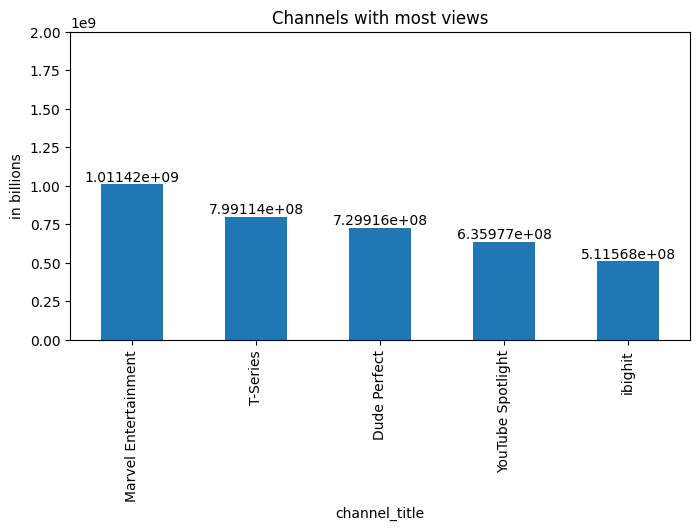

In [ ]:
df2 = df.groupby('channel_title').sum().sort_values('views', ascending=False)['views'].head()
plt.figure(figsize=(8, 4))
df2.plot.bar().bar_label(df2.plot.bar().containers[0])
plt.ylabel('in billions')
plt.ylim(0, 2000000000)
plt.title('Channels with most views')
plt.show()

*We can see that 'Marvel Entertainment' channel has got the highest number of views.*

*Now let's find the channel that has got the highest number of likes.*

---



<ipython-input-481-863bedcb10ac>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



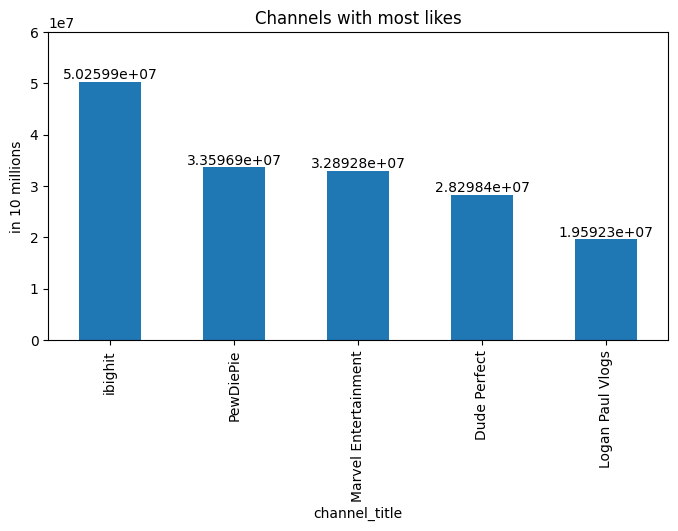

In [ ]:
df3 = df.groupby('channel_title').sum().sort_values('likes', ascending=False)['likes'].head()
plt.figure(figsize=(8, 4))
df3.plot.bar().bar_label(df3.plot.bar().containers[0])
plt.ylim(0,60000000)
plt.ylabel('in 10 millions')
plt.title('Channels with most likes')
plt.show()

*We can see that 'ibighit' channel has received the highest number of likes.*

---



# **5. Conclusion**

*1. We can see that 1/3 of the videos posed is entertainment, followed by new & politics and people & blogs which are 10.2% and 10.1%, respectively.*

*2. We can see that Music has the highest average number of likes among other categories.*

*3. This shows that the channel 'SET India' posted most frequent with 192 videos.*

*4. We can see that 'Marvel Entertainment' channel has got the highest number of views.*

*5. We can see that 'ibighit' channel has received the highest number of likes.*